<a href="https://colab.research.google.com/github/SUDHANSHU4497/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is:
###Data Description -
* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

Importing important library for EDA and visualization

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [7]:
mob_df=df.copy()

In [37]:
pd.set_option("display.max_columns", None)
mob_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
mob_df.shape

(2000, 21)

In [10]:
print(f'our dataset have {mob_df.shape[0]} rows and {mob_df.shape[1]} columns')

our dataset have 2000 rows and 21 columns


In [11]:
# previewing unique value for each columns
for col in mob_df:
    print(f'{col}:\n {mob_df[col].unique()}\n')

battery_power:
 [ 842 1021  563 ... 1139 1467  858]

blue:
 [0 1]

clock_speed:
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

dual_sim:
 [0 1]

fc:
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

four_g:
 [0 1]

int_memory:
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep:
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt:
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
 

* **blue** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **dual_sim** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **four_g** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **three_g** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **touch_screen** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **wifi** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **price_range** have four unique value (1, 2, 3, 0) i.e 0 for low cost, 1 for medium cost, 2 for high cost and 3 for very high cost it means that it is categogical columns

In [14]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

**Insights:**
* data set have 2000 entries and all features have 2000 non null data, it means that our data set no missing values.


* **blue, dual_sim , four_g , three_g , touch_screen ,wifi, price_range** features having categogical informatiom but here it is mention that it is a numerical columns (int64).


In [39]:
mob_df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [18]:
# checking for missing value and sorting null items
mob_df.isnull().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

**Insight:**

Here also we found that there is no missing value in dataset

In [13]:
# change the incorrect datatype
categorical_columns=['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
for column in categorical_columns:
  mob_df[column]=mob_df[column].astype('category')

In [33]:
num_columns=(mob_df.describe()).columns

In [34]:
print(num_columns)

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')


**Check for outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

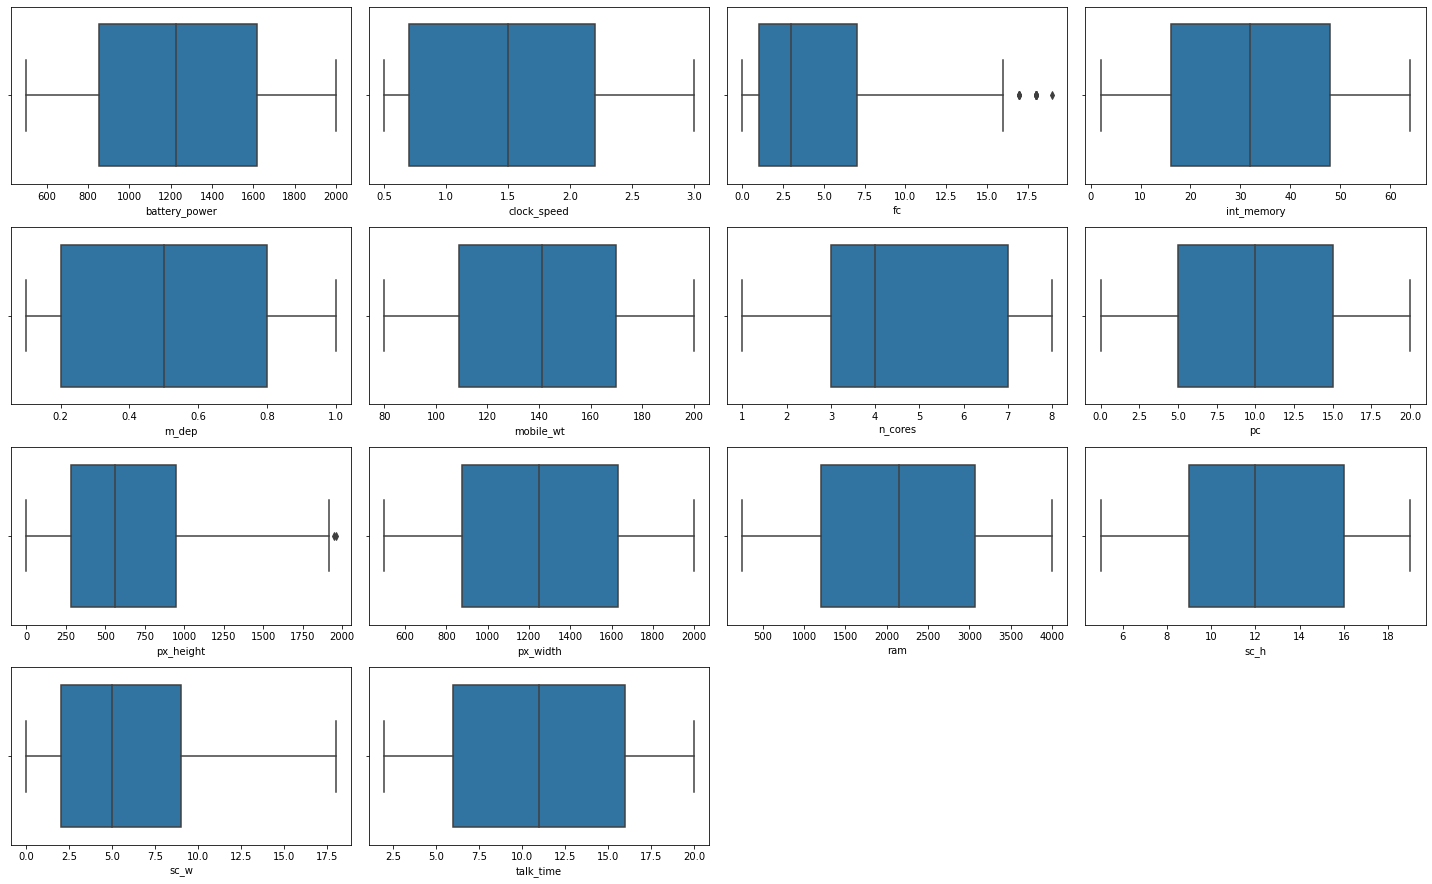

In [29]:
# plotting boxplot for numerical columns
n = 1
plt.figure(figsize=(20,15))
for column in num_columns:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(mob_df[column])
    plt.tight_layout()
plt.show()

In [35]:
min_thresold, max_thresold = mob_df.fc.quantile([0.001, 0.999])
min_thresold, max_thresold

(0.0, 18.0)

In [41]:
mob_df[mob_df.fc < min_thresold]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [42]:
mob_df[mob_df.fc > max_thresold]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1705,1290,1,1.4,1,19,1,35,0.3,110,4,20,405,742,879,16,2,8,1,0,0,0


In [43]:
min_thresold, max_thresold = mob_df.px_height.quantile([0.001, 0.999])
min_thresold, max_thresold

(0.9990000000000001, 1920.029000000006)

In [44]:
mob_df[mob_df.px_height > max_thresold]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


**Insight:**

We found that:
1. Only one row found as an outlier in data in Front Camera mega pixels(fc) 
2. Two rows row found as an outlier in data in Pixel Resolution Height (Px_height).

but we can ignore this because outlier are few in number and closer to the boundary line.